In [1]:
import pandas as pd
import numpy as np
import time
import joblib
import pickle
import os
os.chdir('/sfs/qumulo/qhome/bdr6qz/Documents/MSDS/DS6050')
from modeling import train_models
from helper_functions import get_hardware_details

In [2]:
df = pd.read_csv('df_clean.csv')
labels = df.pop("mvp_share")
df_selected = pd.read_csv('df_selected.csv')
feature_names = list(df_selected.columns)

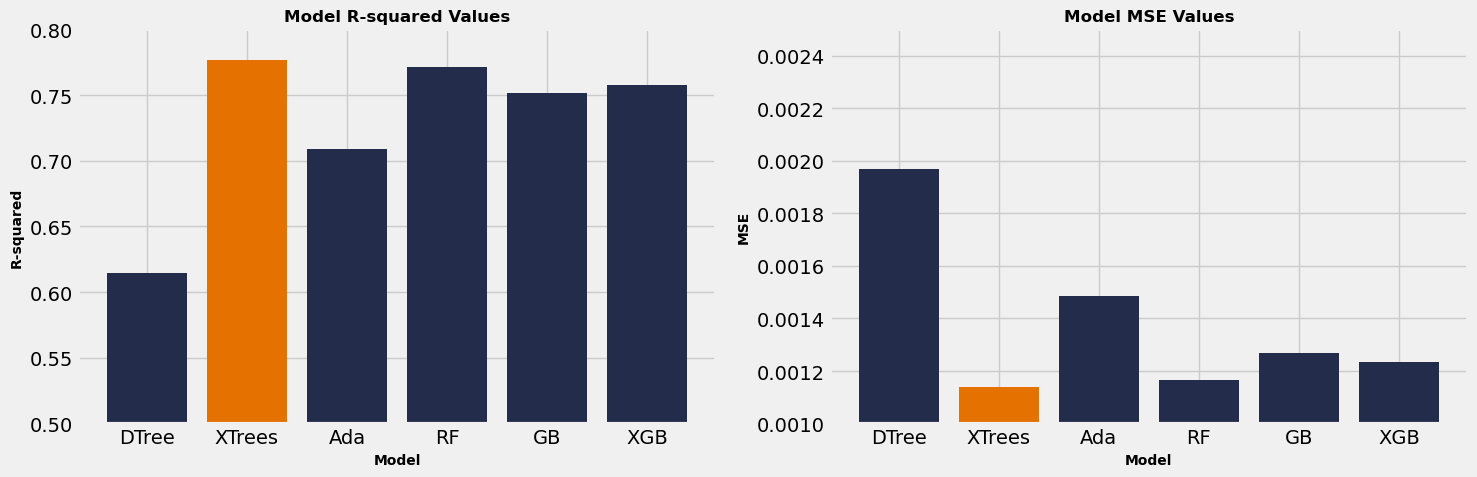

           DTree                         XTrees                         Ada             
│ Feature   │   Importance │  │ Feature   │   Importance │  │ Feature   │   Importance │
╞═══════════╪══════════════╡  ╞═══════════╪══════════════╡  ╞═══════════╪══════════════╡
│ BPM       │      0.55509 │  │ WS        │      0.2578  │  │ PER       │      0.17731 │
├───────────┼──────────────┤  ├───────────┼──────────────┤  ├───────────┼──────────────┤
│ Rk_Year   │      0.19599 │  │ VORP      │      0.20715 │  │ Rk_Year   │      0.14147 │
├───────────┼──────────────┤  ├───────────┼──────────────┤  ├───────────┼──────────────┤
│ WS        │      0.18377 │  │ PER       │      0.14684 │  │ WS        │      0.12387 │
├───────────┼──────────────┤  ├───────────┼──────────────┤  ├───────────┼──────────────┤
│ TOV       │      0.02246 │  │ Rk_Year   │      0.12983 │  │ BPM       │      0.11547 │
├───────────┼──────────────┤  ├───────────┼──────────────┤  ├───────────┼──────────────┤
│ PER       │      0.

In [3]:
start_time = time.time()

(trained_models, 
 results, 
 best_model_name, 
 best_model) = train_models(df_selected,
                            df,
                            labels,
                            feature_names,
                            label_col_name="mvp_share")

end_time = time.time()
execution_time = end_time - start_time
print(f"Model building execution time: {round(execution_time/60, 2)} minutes")

In [4]:
results

{'DTree': {'MSE': 0.001967464134617719, 'R-squared': 0.6144641994708187},
 'XTrees': {'MSE': 0.0011382310238643419, 'R-squared': 0.776957149433398},
 'Ada': {'MSE': 0.0014836679607382634, 'R-squared': 0.709266814627924},
 'RF': {'MSE': 0.0011675035400393738, 'R-squared': 0.7712210332021168},
 'GB': {'MSE': 0.001268452687174729, 'R-squared': 0.7514394729851985},
 'XGB': {'MSE': 0.0012352216714778788, 'R-squared': 0.7579512797387038}}